<a href="https://colab.research.google.com/github/nathfcastro/PROJECT-TWO-/blob/main/Project_Two_Part_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Two Part One 
Student Name: Nathalie Castro 

Whether you chose 2 pre-approved datasets or 2 datasets from another source, or one of each:

Create a notebook where you have uploaded and shown the .head() of each of your data sets. For each of the proposed datasets, include the following information in text cells:

**First choice: dataset 1**
> 1. Source of data
>2. Brief description of data
>3. What is the target?
>4. What does one row represent? (A person?  A business?  An event? A product?)
>5. Is this a classification or regression problem?
>6. How many features does the data have?
>7. How many rows are in the dataset?
>8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

**Second choice: dataset 2**
>1. Source of data
>2. Brief description of data
>3. What is the target?
>4. What does one row represent? (A person?  A business?  An event? A product?)
>5. Is this a classification or regression problem?
>6. How many features does the data have?
>7. How many rows are in the dataset?
>8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

# Data Set One: Cirrhosis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
set_config(display='diagram')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

In [4]:
filename = '/content/cirrhosis.csv'
cirrhosis = pd.read_csv(filename)
cirrhosis.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [5]:
cirrhosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [6]:
cirrhosis.shape

(418, 20)

## How many features does the data have?
* There are 19 features in this data set. 

## What is the target?
* The target is Drug (placebo or D-penicillamine)

## How many rows are in the dataset?

In [7]:
# Display the number of rows and columns for the dataframe
cirrhosis.shape
print(f'There are {cirrhosis.shape[0]} rows, and {cirrhosis.shape[1]} columns.')
print(f'The rows represent {cirrhosis.shape[0]} observations, and the columns represent {cirrhosis.shape[1]-1} features and 1 target variable.')

There are 418 rows, and 20 columns.
The rows represent 418 observations, and the columns represent 19 features and 1 target variable.


## Brief Decscription of Data 

Data Source: https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset

Total of 424 PBC patients that was referred by ther Mayo clinic during a ten-year interval had met an eligible criteria for a randomized placebo-control trial of the drug D-penicillamine. For the first 312 patients that participated in this clinical trial. However, 112 patients did not participate in the clinical trial, but consented to have the basic measurements recorded and siz of the cases were lost to follow-up shortly after diagnosis. 

Below is a description of the columns: 

> * ID: Unique Identifier 
* N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986
* Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)
* Drug: type of drug D-penicillamine or placebo
* Age: age in [days]
* Sex: M (male) or F (female)
* Ascites: presence of ascites N (No) or Y (Yes)
* Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)
* Spiders: presence of spiders N (No) or Y (Yes)
* Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
* Bilirubin: serum bilirubin in [mg/dl]
* Cholesterol: serum cholesterol in [mg/dl]
* Albumin: albumin in [gm/dl]
* Copper: urine copper in [ug/day]
* Alk_Phos: alkaline phosphatase in [U/liter]
* SGOT: SGOT in [U/ml]
* Triglycerides: triglicerides in [mg/dl]
* Platelets: platelets per cubic [ml/1000]
* Prothrombin: prothrombin time in seconds [s]
* Stage: histologic stage of disease (1, 2, 3, or 4)






## Is this a classification or regression problem?
> * This is a classification problem 

## What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
> * Some challanges I forsee is probably exploring this data because there are a lot of columns in this data set. Additionally, I may have some challanges with cleaning because there may be rows that I have to replace because the data is not the same or there maybe a lot of missing data that I have to impute. 

## Cleaning Data

In [8]:
cirrhosis.duplicated().sum()

0

There are no duplicates. 

In [9]:
cirrhosis.nunique()

ID               418
N_Days           399
Status             3
Drug               2
Age              344
Sex                2
Ascites            2
Hepatomegaly       2
Spiders            2
Edema              3
Bilirubin         98
Cholesterol      201
Albumin          154
Copper           158
Alk_Phos         295
SGOT             179
Tryglicerides    146
Platelets        243
Prothrombin       48
Stage              4
dtype: int64

Looking at the dataset the "ID" column is unnecessary because this is only being used as a unique identifier 

In [10]:
# Drops the ID column
cirrhosis.drop(columns="ID", inplace=True)

In [11]:
cirrhosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

In [12]:
cat_cols = make_column_selector(dtype_include='object')(cirrhosis)
for col in cat_cols:
  display(cirrhosis[col].value_counts())

C     232
D     161
CL     25
Name: Status, dtype: int64

D-penicillamine    158
Placebo            154
Name: Drug, dtype: int64

F    374
M     44
Name: Sex, dtype: int64

N    288
Y     24
Name: Ascites, dtype: int64

Y    160
N    152
Name: Hepatomegaly, dtype: int64

N    222
Y     90
Name: Spiders, dtype: int64

N    354
S     44
Y     20
Name: Edema, dtype: int64

There are no outliers in the categorial columns 

In [13]:
# Get summary stats to hopefully discern some outliers
cirrhosis.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


There are no concerning outliers in this set 

In [14]:
# Check for missing values
cirrhosis.isna().sum()

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

We will handle these missing values when we preprocess our data to avoid any data leakage. 

In [15]:
cirrhosis['Drug'] = cirrhosis['Drug'].fillna(value ='Unknown')

In [16]:
cirrhosis['Drug'].value_counts()

D-penicillamine    158
Placebo            154
Unknown            106
Name: Drug, dtype: int64

## Exploratory Univariate Visuals

In [17]:
cirrhosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           418 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

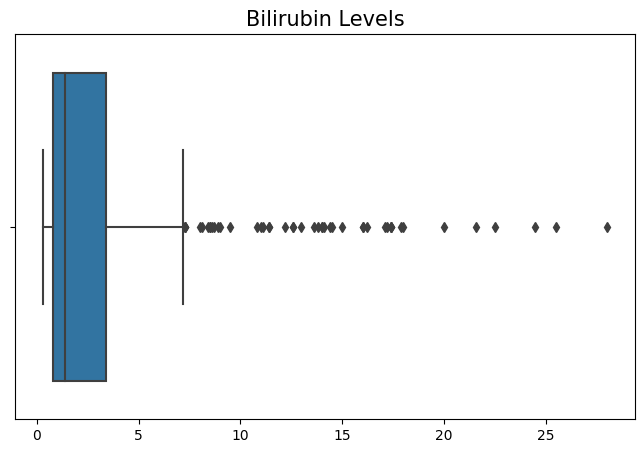

In [18]:
fig = plt.figure(figsize =(8, 5))
ax = sns.boxplot( x="Bilirubin", data=cirrhosis)
ax.set_title("Bilirubin Levels", fontsize = 15);
ax.set_xlabel('');

The outliers is anything over 5mg/dL

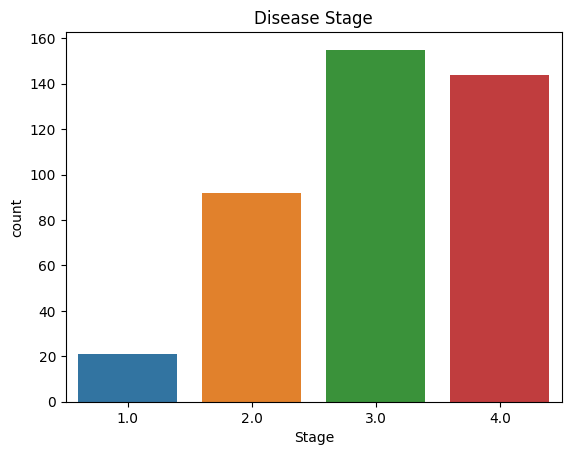

In [19]:
sns.countplot(data=cirrhosis, x="Stage").set_title("Disease Stage");

The majority of the patients are in Stage 3 while the minority of patients are in Stage 1. 

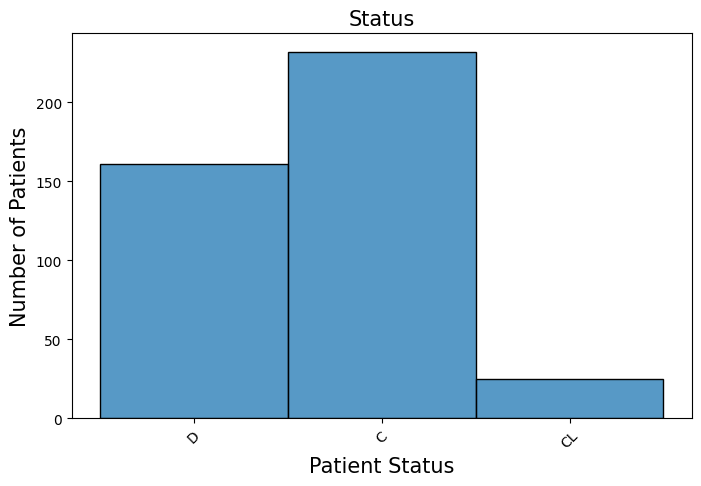

In [20]:
fig = plt.figure(figsize =(8, 5))
ax = sns.histplot( x = "Status", data=cirrhosis)
plt.xticks(rotation=45)
ax.set_ylabel('Number of Patients',fontsize = 15)
ax.set_xlabel('Patient Status', fontsize = 15)
ax.set_title("Status", fontsize = 15);

Majority of patients are censored while the minority is censored due to liver tx and the average of patients are deceased. 

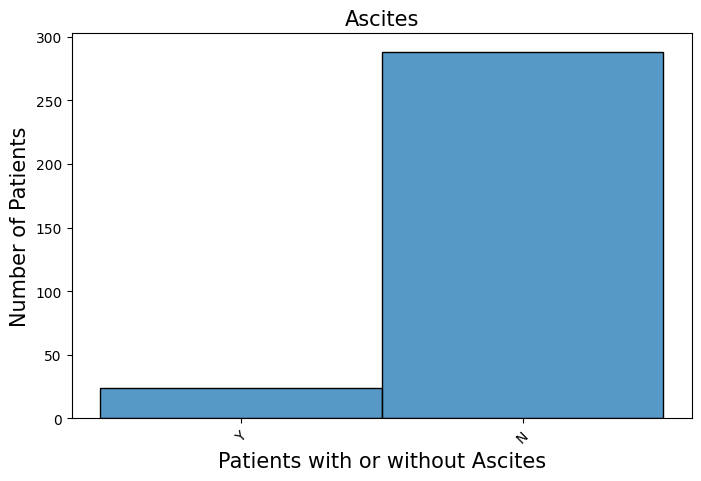

In [21]:
fig = plt.figure(figsize =(8, 5))
ax = sns.histplot( x = "Ascites", data=cirrhosis)
plt.xticks(rotation=45)
ax.set_ylabel('Number of Patients',fontsize = 15)
ax.set_xlabel('Patients with or without Ascites', fontsize = 15)
ax.set_title("Ascites", fontsize = 15);

Majority of patients do not have Ascites

<ipython-input-22-26a886066a18>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = cirrhosis.corr()


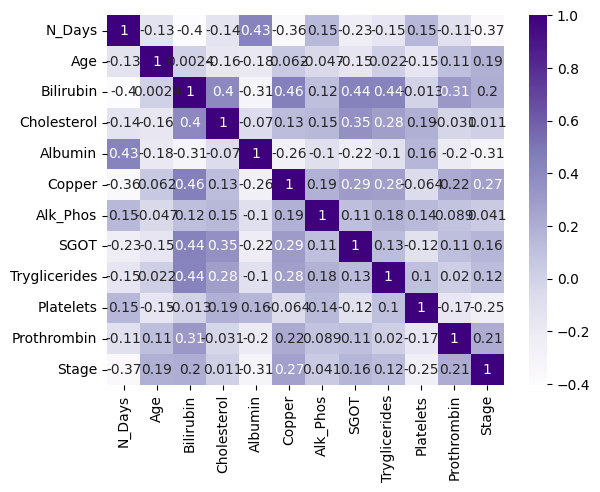

In [22]:
corr = cirrhosis.corr()
sns.heatmap(corr, cmap = 'Purples', annot = True)
plt.show()

## Multi-Variate Visuals
Best Graphs Chosen Drug

<ipython-input-23-f71c476a7ed9>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-pastel")


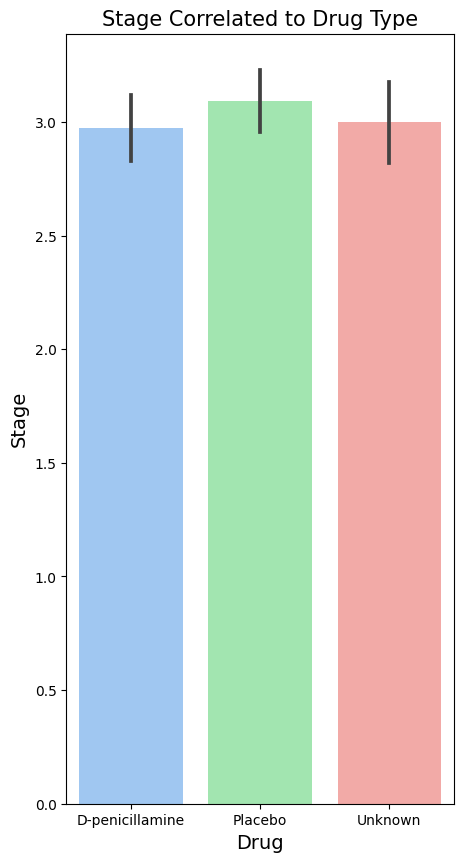

In [23]:
plt.style.use("seaborn-pastel")
fig, ax = plt.subplots(figsize=(5,10))
sns.barplot(data=cirrhosis, x="Drug", y= "Stage")
plt.title("Stage Correlated to Drug Type", fontsize = 15)
plt.xlabel("Drug", fontsize = 14)
plt.ylabel("Stage", fontsize = 14)
plt.show();

Majority of patients who use the placebo drug is Stage 4 and the majority of patients who use the D-penicillamine is Stage 3 or less. 

<ipython-input-24-0957d011110d>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-pastel")


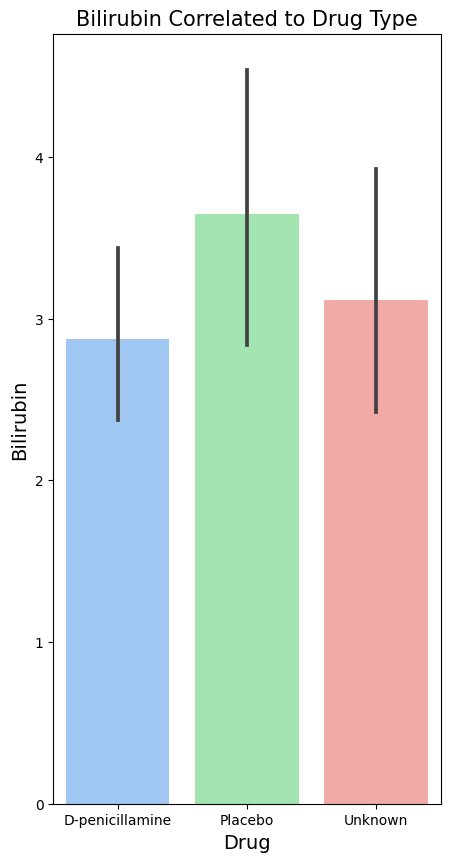

In [24]:
plt.style.use("seaborn-pastel")
fig, ax = plt.subplots(figsize=(5,10))
sns.barplot(data=cirrhosis, x="Drug", y= "Bilirubin")
plt.title("Bilirubin Correlated to Drug Type", fontsize = 15)
plt.xlabel("Drug", fontsize = 14)
plt.ylabel("Bilirubin", fontsize = 14)
plt.show();

<ipython-input-25-658a36bb48d4>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-pastel")


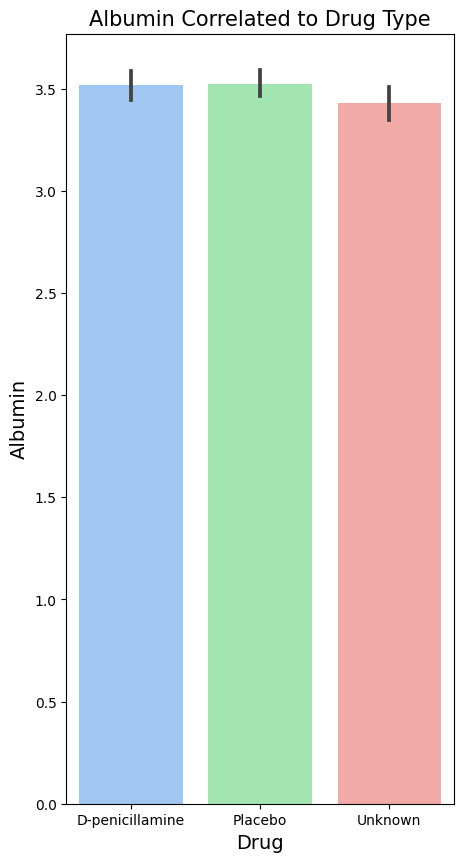

In [25]:
plt.style.use("seaborn-pastel")
fig, ax = plt.subplots(figsize=(5,10))
sns.barplot(data=cirrhosis, x="Drug", y= "Albumin")
plt.title("Albumin Correlated to Drug Type", fontsize = 15)
plt.xlabel("Drug", fontsize = 14)
plt.ylabel("Albumin", fontsize = 14)
plt.show();

The albumin is the same for patients who take the D-penicillamine and the palcebo. 

### Best Graph Chosen is Stage

<ipython-input-26-d3e4b2b98a5d>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-pastel")


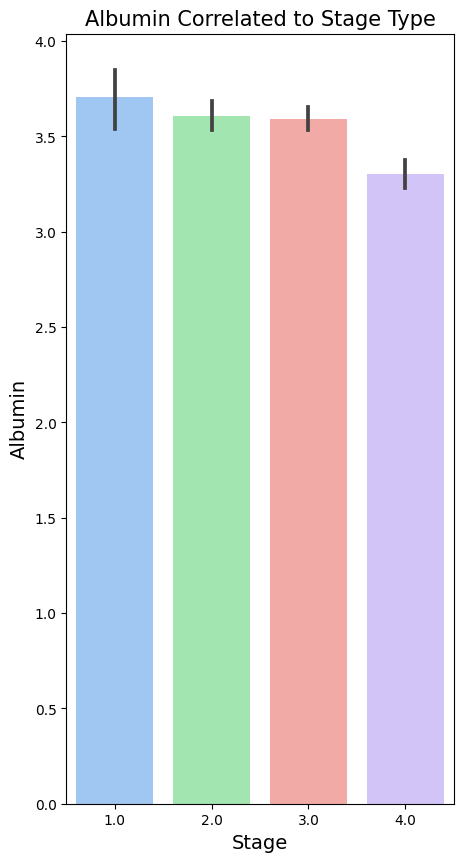

In [26]:
plt.style.use("seaborn-pastel")
fig, ax = plt.subplots(figsize=(5,10))
sns.barplot(data=cirrhosis, x="Stage", y= "Albumin")
plt.title("Albumin Correlated to Stage Type", fontsize = 15)
plt.xlabel("Stage", fontsize = 14)
plt.ylabel("Albumin", fontsize = 14)
plt.show();

Patients in stage 1 have a higher albumin while patients with stage 4 have a lower albumin level. 

<ipython-input-27-84bc7281b93c>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-pastel")


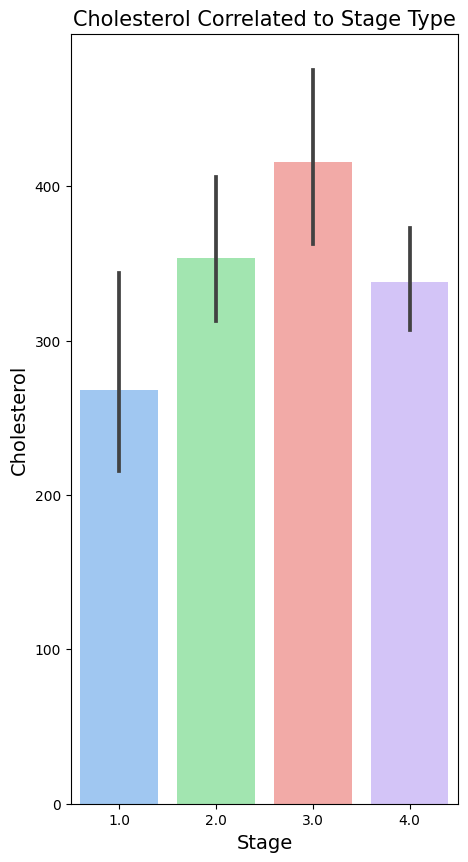

In [27]:
plt.style.use("seaborn-pastel")
fig, ax = plt.subplots(figsize=(5,10))
sns.barplot(data=cirrhosis, x="Stage", y= "Cholesterol")
plt.title("Cholesterol Correlated to Stage Type", fontsize = 15)
plt.xlabel("Stage", fontsize = 14)
plt.ylabel("Cholesterol", fontsize = 14)
plt.show();

Patients in stage 3 have a higher cholesterol while patients in Stage 1 have a lower cholesterol. 

### Predictive Analysis

In [28]:
# Create the feature matrix
X = cirrhosis.drop(columns=["Drug"])
# Create the target vector
y = cirrhosis["Drug"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
print(cat_selector(X_train))
print(num_selector(X_train))

['Status', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']


In [31]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [32]:
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [33]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [34]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f1c96abde80>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f1c93f40f70>)])

In [35]:
# fit on train
preprocessor.fit(X_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f1c96abde80>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f1c93f40f70>)])

In [36]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [37]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (313, 26)




array([[ 0.82710028,  1.09467267, -0.35808356, ...,  1.        ,
         0.        ,  0.        ],
       [ 2.20027707, -0.64801159, -0.57022266, ...,  1.        ,
         0.        ,  0.        ],
       [-0.30530031, -0.94376143, -0.2166575 , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.32693255, -0.03691404, -0.47593862, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.88259167,  0.29115957, -0.38165457, ...,  1.        ,
         0.        ,  0.        ],
       [-1.6991688 , -0.17715342, -0.12237346, ...,  0.        ,
         0.        ,  1.        ]])

In [38]:
cirrhosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           418 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

### Random Forrest Classifier

In [39]:
rf =  RandomForestClassifier(random_state = 42)

rf.fit(X_train_processed, y_train)

rf_train_score = rf.score(X_train_processed, y_train)
rf_test_score = rf.score(X_test_processed, y_test)
print(rf_train_score)
print(rf_test_score)

1.0
0.6761904761904762


In [40]:
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depths)

17

In [41]:
depths = range(1, max(est_depths))
scores = pd.DataFrame(index=depths, columns=['Test Score'])
for depth in depths:    
   model = RandomForestClassifier(max_depth=depth)
   model.fit(X_train_processed, y_train)
   scores.loc[depth, 'Train Score'] = model.score(X_train_processed, y_train)
   scores.loc[depth, 'Test Score'] = model.score(X_test_processed, y_test)
   scores.head()

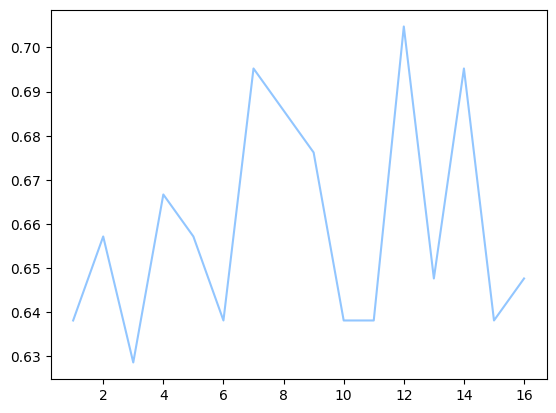

In [42]:
plt.plot(scores['Test Score'])
fig.savefig('testscore.png', dpi = 300)

In [43]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
12,0.704762,1.000000
7,0.695238,0.996805
14,0.695238,1.000000
8,0.685714,0.996805
9,0.67619,1.000000


In [44]:
param_grid = {'max_depth': [2,50,100],
              'min_samples_leaf': [2,150,200],
              'min_samples_split': [2, 10, 100]}

In [45]:
dt_grid_search = GridSearchCV(model, param_grid)
#Fit
dt_grid_search.fit(X_train_processed, y_train)
dt_grid_search.best_params_

{'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 10}

In [46]:
param_grid2 = {'max_depth': [50,150,200],
              'min_samples_leaf': [2,3,4],
              'min_samples_split': [10, 20, 30]}

model.fit(X_train_processed, y_train)

RandomForestClassifier(max_depth=16)

In [47]:
dt_grid_search2 = GridSearchCV(model, param_grid2)
#Fit
dt_grid_search2.fit(X_train_processed, y_train)
dt_grid_search2.best_params_

{'max_depth': 200, 'min_samples_leaf': 2, 'min_samples_split': 10}

In [48]:
param_grid3 = {'max_depth': range(155,160),
              'min_samples_leaf': range(1,3),
              'min_samples_split': range(75,89)}
 
dt_grid_search3 = GridSearchCV(model, param_grid3)
dt_grid_search3.fit(X_train_processed, y_train)
dt_grid_search3.best_params_

{'max_depth': 159, 'min_samples_leaf': 1, 'min_samples_split': 84}

In [49]:
#retrieve the best version of the model
best_model = dt_grid_search3.best_estimator_
 
#refit the model on the whole training set
best_model.fit(X_train_processed, y_train)
#score the model on the test set
best_model.score(X_test_processed, y_test)
predictions = best_model.predict(X_test_processed)

                 precision    recall  f1-score   support

D-penicillamine       0.41      0.45      0.43        31
        Placebo       0.52      0.45      0.48        38
        Unknown       0.95      1.00      0.97        36

       accuracy                           0.64       105
      macro avg       0.62      0.63      0.63       105
   weighted avg       0.63      0.64      0.63       105

[[14 16  1]
 [20 17  1]
 [ 0  0 36]]


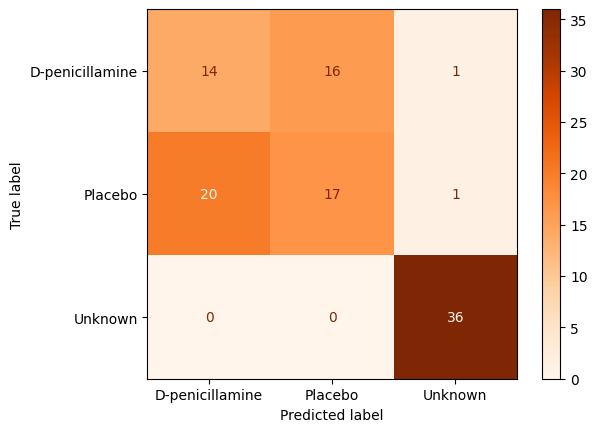

In [50]:
print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test.values, predictions)
print(cm)
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap = "Oranges");

### KNN

In [51]:
scaler = StandardScaler()
knn = KNeighborsClassifier(n_neighbors=1)
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

In [52]:
predictions = knn_pipe.predict(X_test_processed)
predictions

array(['Unknown', 'Placebo', 'Unknown', 'D-penicillamine', 'Placebo',
       'D-penicillamine', 'D-penicillamine', 'Unknown', 'D-penicillamine',
       'Unknown', 'D-penicillamine', 'Unknown', 'Unknown', 'Unknown',
       'Unknown', 'Placebo', 'Unknown', 'Unknown', 'D-penicillamine',
       'Unknown', 'Unknown', 'Placebo', 'Unknown', 'Placebo', 'Placebo',
       'Placebo', 'Unknown', 'D-penicillamine', 'Unknown',
       'D-penicillamine', 'D-penicillamine', 'Unknown', 'D-penicillamine',
       'Placebo', 'D-penicillamine', 'D-penicillamine', 'D-penicillamine',
       'D-penicillamine', 'Placebo', 'Placebo', 'Placebo', 'Placebo',
       'Unknown', 'D-penicillamine', 'D-penicillamine', 'Placebo',
       'Unknown', 'D-penicillamine', 'D-penicillamine', 'Placebo',
       'Placebo', 'Placebo', 'D-penicillamine', 'Unknown', 'Unknown',
       'D-penicillamine', 'Placebo', 'D-penicillamine', 'Unknown',
       'Placebo', 'D-penicillamine', 'Unknown', 'Unknown',
       'D-penicillamine', 'D-peni

In [53]:
# calculate classification accuracy
acc_score = knn_pipe.score(X_test_processed, y_test)
acc_score

0.5714285714285714

In [54]:
param_grid = {'kneighborsclassifier__n_neighbors': [1,5,10],
              'kneighborsclassifier__p': [1,5,10],
              'kneighborsclassifier__weights': ['distance','uniform']}

In [55]:
knn_pipe_gs = GridSearchCV(knn_pipe, param_grid)
 
knn_pipe_gs.fit(X_train_processed, y_train)
print('Best KNN Parameters:')
print(knn_pipe_gs.best_params_)
best_pipe = knn_pipe_gs.best_estimator_
best_pipe.fit(X_train_processed, y_train)
predictions = best_pipe.predict(X_test_processed)
print(f'Accuracy of best KNN model is: {best_pipe.score(X_test_processed, y_test)}')

Best KNN Parameters:
{'kneighborsclassifier__n_neighbors': 10, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform'}
Accuracy of best KNN model is: 0.6190476190476191


                 precision    recall  f1-score   support

D-penicillamine       0.42      0.52      0.46        31
        Placebo       0.59      0.34      0.43        38
        Unknown       0.80      1.00      0.89        36

       accuracy                           0.62       105
      macro avg       0.60      0.62      0.60       105
   weighted avg       0.61      0.62      0.60       105

[[16  9  6]
 [22 13  3]
 [ 0  0 36]]


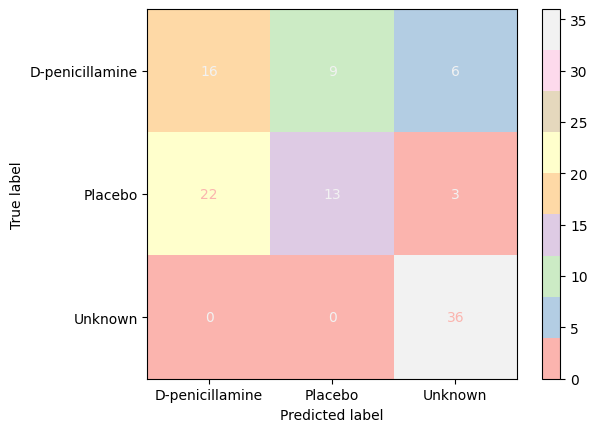

In [56]:
print(classification_report(y_test, predictions))
cm2 = confusion_matrix(y_test.values, predictions)
print(cm2)
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap = "Pastel1");

In [57]:
param_grid = {'kneighborsclassifier__n_neighbors': range(1,10),
              'kneighborsclassifier__p': range(1,5),
              'kneighborsclassifier__weights': ['distance','uniform']}

In [58]:
knn_pipe_gs = GridSearchCV(knn_pipe, param_grid)
 
knn_pipe_gs.fit(X_train_processed, y_train)
print('Best KNN Parameters:')
print(knn_pipe_gs.best_params_)
best_pipe = knn_pipe_gs.best_estimator_
print(f'Accuracy of best KNN model is: {best_pipe.score(X_test_processed, y_test)}')

Best KNN Parameters:
{'kneighborsclassifier__n_neighbors': 6, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform'}
Accuracy of best KNN model is: 0.5619047619047619
